In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`).

In [2]:
df_ccData = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv')
print(df_ccData.shape)
df_ccData.head()

(1319, 12)


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
df_ccData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


## Preparation

-   Create the target variable by mapping `yes` to 1 and `no` to 0.
-   Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.


In [4]:
card_encoding = {'yes':1, 'no':0}
df_ccData['card'] = df_ccData.card.map(card_encoding)
df_ccData.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [5]:
df_ccData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


In [6]:
df_ccData.describe().T

,count,mean,std,min,25%,50%,75%,max
card,1319.0,0.775588,0.417353,0.000000,1.000000,1.000000,1.000000,1.00000
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.50000
income,1319.0,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.00000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df_ccData,test_size=0.2,random_state=1)
df_train, df_valid = train_test_split(df_full_train,test_size=0.25,random_state=1)

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_valid = df_valid.card.values
y_test = df_test.card.values

del df_train['card']
del df_valid['card']
del df_test['card']

df_train.shape, df_valid.shape, df_test.shape

((791, 11), (264, 11), (264, 11))

## Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that
-   For each numerical variable, use it as score and compute AUC with the `card` variable.
-   Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?
-   `reports`
-   `dependents`
-   `active`
-   `share`

In [9]:
from sklearn.metrics import roc_auc_score

In [10]:
numeric = list(df_train.columns[df_train.dtypes!='object'])
print(numeric)

['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']


In [11]:
for feature in numeric:
    auc_score = roc_auc_score(y_train, df_train[feature])
    if auc_score < 0.5:
        auc_score = roc_auc_score(y_train, -df_train[feature])
    print(f"{feature:10s} \t{round(auc_score,3)}")

reports    	0.717
age        	0.524
income     	0.591
share      	0.989
expenditure 	0.991
dependents 	0.533
months     	0.529
majorcards 	0.534
active     	0.604


## Training the model
From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using `DictVectorizer `and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

In [12]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [13]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", 
            "owner", "selfemp"]
dv = DictVectorizer(sparse=False)

dicts_train = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(dicts_train)
X_train.shape

(791, 13)

In [14]:
lr_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [15]:
dicts_valid = df_valid[features].to_dict(orient='records')
X_valid = dv.transform(dicts_valid)
X_valid.shape

(264, 13)

In [16]:
y_prob_positive = lr_model.predict_proba(X_valid)[:,1]

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)
-   0.615
-   0.515
-   0.715
-   0.995

In [17]:
round(roc_auc_score(y_valid,y_prob_positive),3)

0.995

## Question 3
Now let's compute precision and recall for our model.
-   Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
-   For each threshold, compute precision and recall
-   Plot them

At which threshold precision and recall curves intersect?
-   0.1
-   0.3
-   0.6
-   0.8

In [18]:
from sklearn.metrics import precision_recall_fscore_support

In [19]:
scores = []

for theta in np.linspace(0,1,101):
    y_pred = (y_prob_positive >= theta).astype(int)
    p,r,f1,_ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
    scores.append((theta,p,r,f1))

cols = ['threshold', 'precision', 'recall', 'f1_score']
df_scores = pd.DataFrame(scores, columns=cols)

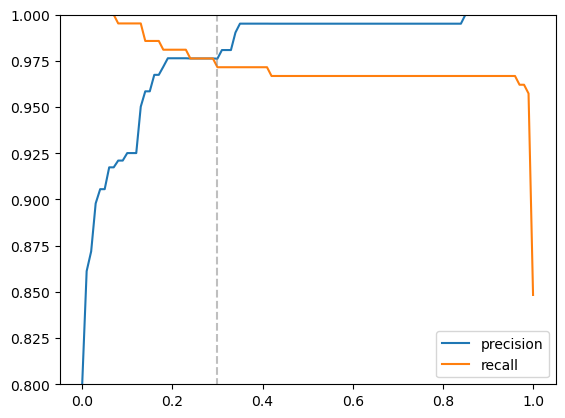

In [20]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')
plt.ylim([0.8,1.0])
plt.vlines(0.3, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?
-   0.1
-   0.4
-   0.6
-   0.7

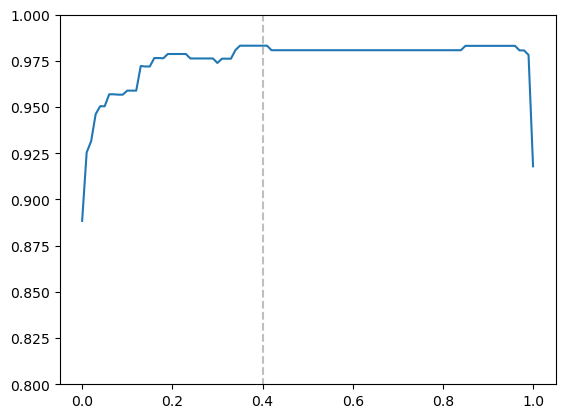

In [21]:
plt.plot(df_scores.threshold, df_scores.f1_score)
plt.vlines(0.4, 0, 1, color='grey', linestyle='--', alpha=0.5)
plt.ylim([0.8,1.0])
plt.show()

## Question 5
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
`KFold(n_splits=5, shuffle=True, random_state=1)`
-   Iterate over different folds of df_full_train
-   Split the data into train and validation
-   Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
-   Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?
-   0.003
-   0.014
-   0.09
-   0.24

In [22]:
from sklearn.model_selection import KFold

In [25]:
def train(df, columns, y, C=1.0):
    dicts = df[columns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    lr = LogisticRegression(solver='liblinear',C=C,max_iter=1000)
    lr.fit(X,y)
    return dv, lr

def predict_prob(df, columns, dv, model):
    dicts = df[columns].to_dict(orient='records')
    X = dv.transform(dicts)
    y_prob = model.predict_proba(X)[:,1]
    return y_prob

In [27]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
for train_idx, valid_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_valid = df_full_train.iloc[valid_idx]
    y_train = df_train.card.values
    y_valid = df_valid.card.values
    dv, model = train(df_train, features, y_train)
    y_prob_positive = predict_prob(df_valid, features, dv, model)
    score = roc_auc_score(y_valid, y_prob_positive)
    scores.append(score)

print(f"For AUC scores, mean is {np.mean(scores):.3f}, standard deviation is {np.std(scores):.3f}")

For AUC scores, mean is 0.996, standard deviation is 0.003


## Question 6
Now let's use 5-Fold cross-validation to find the best parameter C
-   Iterate over the following C values: `[0.01, 0.1, 1, 10]`
-   Initialize `KFold` with the same parameters as previously
-   Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
-   Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?
-   0.01
-   0.1
-   1
-   10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [31]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []
    for train_idx, valid_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_valid = df_full_train.iloc[valid_idx]
        y_train = df_train.card.values
        y_valid = df_valid.card.values
        dv, model = train(df_train, features, y_train, C=C)
        y_prob_positive = predict_prob(df_valid, features, dv, model)
        score = roc_auc_score(y_valid, y_prob_positive)
        scores.append(score)
    print(f"For C={C:2.2f} AUC scores, mean is {np.mean(scores):.3f}, standard deviation is {np.std(scores):.3f}")

For C=0.01 AUC scores, mean is 0.992, standard deviation is 0.006
For C=0.10 AUC scores, mean is 0.995, standard deviation is 0.004
For C=1.00 AUC scores, mean is 0.996, standard deviation is 0.003
For C=10.00 AUC scores, mean is 0.996, standard deviation is 0.003
